In [1]:
# FAIRe Qualitäts-KPIs
Autor: "Jonathan Kollmann"  
Datum: "05.11.2023"

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie kann die Qualität von Lego-Autos mittels KPIs, welche von bauteilspezifischen Kennwerten abhängen, bestimmt und verbessert werden?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Auto gemäß den Vorgaben zusammenbauen und KPIs berechnen, welche eine Aussage über Aufwand, Akzeptanz und Verfügbarkeit treffen sollen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Auto 1](figures/Auto1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Auto mit einem durch Pins verbundenen Rahmen durch welchen zwei Achsen gesteckt sind. 
Eine davon fungiert als Antriebsachse.
Auf den Enden der Achsen ist jeweils ein Rad gesteckt und gegen Verschieben entlang der Achse gesichert.
Batterie und Motor befinden sich auf dem Fahrgestell. 
Motorwelle und Antriebsachse sind durch ein Getriebe, bestehend aus zwei Zahnrädern, verbunden.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [2]:
# Import benötigter Bibliotheken
import json
import pprint
from functions import calculation_rules
import matplotlib.pyplot as plt
from functions.classes import *

In [3]:
# Die Komponenten des ersten Autos werden initialisiert, indem die json-Teilegruppendatenblätter importiert werden, 
# sobald Teile aus ihren jeweiligen Teilegruppen benötigt werden.
# Die Teile werden mit ihrer spezifische Teilenummer aufgerufen, in einer passenden Variable gespeichert
# und die jeweilige Farbe zugewiesen. 
# Sich doppelnde Teile werden fortlaufend nummeriert, damit sie einzeln eindeutig identifizierbar sind.
# Man könnte sich doppelnde Teile auch eleganter über eine Schleife einlesen. Allerdings halte ich mein Vorgehen für
# übersichtlicher. Außerdem kann man so die Farben einzelner sich doppelnder Teile variabler anpassen.
# Beim Zusammenbau von Unterbaugruppen, Baugruppen und vom Gesamtsystem wird beschrieben wie dabei vorzugehen ist.
# Bei der Zuordnung von Teilen zu Baugruppen habe ich darauf geachtet, dass es nach der Lego-Logik funktioniert.
# Deshalb bilden bei mir beispielsweise die Achsen mit den Rädern, dem Zahnrad und den Stoppern keine eigene Baugruppe, 
# weil man sie im zusammengebauten Zustand nicht in die Unterbaugruppe Body einbauen könnte. Stattdessen bilden die
# Einzelteile der Achse und die Unterbaugruppe body die Baugruppe Chassis.

### body subassembly
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file) 
    
front_frame_1 = LegoComponent("front frame", frame["32532"], {"color": "blue"})  
middle_frame_1 = LegoComponent("middle frame", frame["32532"], {"color": "blue"}) 
                            
back_frame_1_1 = LegoComponent("back frame 1", frame["32531"], {"color": "blue"})
back_frame_1_2 = LegoComponent("back frame 2", frame["32531"], {"color": "blue"})
back_frame_1_3 = LegoComponent("back frame 3", frame["32531"], {"color": "blue"})
          
pin_1_1 = LegoComponent("pin 1", frame["3673"], {"color": "light grey"}) 
pin_1_2 = LegoComponent("pin 2", frame["3673"], {"color": "light grey"})  
pin_1_3 = LegoComponent("pin 3", frame["3673"], {"color": "light grey"})   
pin_1_4 = LegoComponent("pin 4", frame["3673"], {"color": "light grey"}) 
pin_1_5 = LegoComponent("pin 5", frame["3673"], {"color": "light grey"}) 
pin_1_6 = LegoComponent("pin 6", frame["3673"], {"color": "light grey"})
pin_1_7 = LegoComponent("pin 7", frame["3673"], {"color": "light grey"}) 
pin_1_8 = LegoComponent("pin 8", frame["3673"], {"color": "light grey"})   
pin_1_9 = LegoComponent("pin 9", frame["3673"], {"color": "light grey"})  
                          
body_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "body subassembly",
    assembly_method="connect the frames by using the pins")
body_assembly.add([front_frame_1, middle_frame_1, back_frame_1_1, back_frame_1_2, back_frame_1_3,
                   pin_1_1, pin_1_2, pin_1_3, pin_1_4, pin_1_5, pin_1_6, pin_1_7, pin_1_8, pin_1_9])    
                          
## wheels and axles
little_bush_1_1 = LegoComponent("little bush 1", frame["32123"], {"color": "yellow"}) 
little_bush_1_2 = LegoComponent("little bush 2", frame["32123"], {"color": "yellow"})
little_bush_1_3 = LegoComponent("little bush 3", frame["32123"], {"color": "yellow"})
little_bush_1_4 = LegoComponent("little bush 4", frame["32123"], {"color": "yellow"})
little_bush_1_5 = LegoComponent("little bush 5", frame["32123"], {"color": "yellow"})
little_bush_1_6 = LegoComponent("little bush 6", frame["32123"], {"color": "yellow"})

big_bush_1_1 = LegoComponent("big bush 1", frame["3713"], {"color": "red"})  
big_bush_1_2 = LegoComponent("big bush 2", frame["3713"], {"color": "red"})
                                               
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
            
front_axle_1 = LegoComponent("front axle", axles["23948"], {"color": "black"})                           
                           
back_axle_1 = LegoComponent("back axle", axles["50451"], {"color": "black"})
                                                    
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
wheel_1_1 = LegoComponent("wheel 1", wheels["56904c02"], {"color": "light grey"})
wheel_1_2 = LegoComponent("wheel 2", wheels["56904c02"], {"color": "light grey"})
wheel_1_3 = LegoComponent("wheel 3", wheels["56904c02"], {"color": "light grey"})
wheel_1_4 = LegoComponent("wheel 4", wheels["56904c02"], {"color": "light grey"})
                                            
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file) 
                          
axle_gear_1 = LegoComponent("axle gear", gears["94925"], {"color": "dark grey"})

## chassis assembly
chassis_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "chassis assembly",
    assembly_method="put the axles trough the body, the bushes, the gear and the body subassembly in the right order")
chassis_assembly.add([body_assembly, little_bush_1_1, little_bush_1_2, little_bush_1_3, little_bush_1_4, little_bush_1_5, little_bush_1_6,
                      big_bush_1_1, big_bush_1_2, front_axle_1, back_axle_1, wheel_1_1, wheel_1_2, wheel_1_3, wheel_1_4, axle_gear_1])
   
    
## motor assembly
motor_gear_1 = LegoComponent("motor gear", gears["94925"], {"color": "light grey"})  
                           
motor_axle_1 = LegoComponent("motor axle", axles["32073"], {"color": "black"})
                           
motor_bush_1 = LegoComponent("motor bush", frame["32123"], {"color": "yellow"})
                           
gear_bush_1 = LegoComponent("gear bush", frame["3713"], {"color": "red"})                          
                          
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)     
motor_1 = LegoComponent("motor", motors["8883-1"], {"color": "light grey"})
                      
motor_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motor assembly",
    assembly_method="put the axle into the motor, then add the bushes and the gear")
motor_assembly.add([motor_1, motor_axle_1, motor_bush_1, motor_gear_1, gear_bush_1])                      
                      
                          
## battery                          
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)     
battery = LegoComponent("battery", batteries["8878-1"], {"color": "light grey"})
                         
    
# car assembly                       
car_1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car 1",
    manufacturer="Jonathan Kollmann",
    assembly_method="connect the motor assembly and the battery with the chassis")
car_1.add([chassis_assembly, motor_assembly, battery])       

# Zum besseren Verständnis der Unterteilung in Unterbaugruppen und Baugruppen wird der assembly tree ausgegeben.
print_assembly_tree(car_1)

LegoAssembly car 1 [42049d8c-2d96-4e43-8c41-356f4401cf73]
├── LegoAssembly chassis assembly [2358ba7a-f204-49a4-ad2a-dbcae5035d7a]
│   ├── LegoAssembly body subassembly [6fd4d78f-e921-4d48-8197-ef159c5ffb0c]
│   │   ├── LegoComponent front frame [5853bb0e-6e09-414d-9567-dc7b670706a4]
│   │   ├── LegoComponent middle frame [bfed04df-a8ce-4330-8bf0-d08a64fdfc5e]
│   │   ├── LegoComponent back frame 1 [04c64cf9-cc7d-447a-af1d-6d7984ebd72f]
│   │   ├── LegoComponent back frame 2 [73898459-20a2-4923-853c-5a875178ca1b]
│   │   ├── LegoComponent back frame 3 [467a2694-72c7-46c3-b064-87c63dc9c287]
│   │   ├── LegoComponent pin 1 [5d2e4fd0-a814-4a43-b566-658810c769a5]
│   │   ├── LegoComponent pin 2 [61578bf6-8048-4d16-84b6-0bbe3ac0f48c]
│   │   ├── LegoComponent pin 3 [38d014e3-eaeb-493a-b617-d9e3a3b02172]
│   │   ├── LegoComponent pin 4 [b28d754c-f024-49a2-8ede-1e70c5284772]
│   │   ├── LegoComponent pin 5 [f2d0a24a-514c-4294-8189-c39f7da636a0]
│   │   ├── LegoComponent pin 6 [55799b45-6a08-4

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

Aufwand: Dieser wird über den Gesamtpreis des Fahrzeugs ermittelt. Damit soll festgestellt werden, wie groß der Produktionsaufwand ist und welches unternehmerisches Risiko für den Hersteller vorhanden ist, falls sich das Produkt beispielsweise nicht in der erwarteten Stükzahl verkaufen lässt.
Berechnungsvorschrift: Gesamtpreis = Summe aller Einzelteilpreise

Akzeptanz: Sie soll ein Indikator dafür sein, wie der Kunde das Produkt annimmt, wenn er die Größe (Gewicht) und den Preis zwischen verschiedenen Autos vergleicht. 
Berechnungsvorschrift: Preis-Leistungs-Verhältnis = Gesamtpreis / Gesamtmasse (Summe aller Einzelteilmassen) 

Verfügbarkeit: Sie gibt an, wie lange es dauert, bis alle benötigten Einzelteile geliefert werden können.
Berechnungsvorschrift: Lieferzeit = Lieferzeit des Bauteils mit längster Lieferdauer

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [4]:
# Testfunktion wird aufgerufen
calculation_rules.test_function()

You called the test function.


In [5]:
# Die anderen Funktionen aus dem calculation_rules-Code werden aufgerufen,
# um die KPI-Werte für den Aufwand, die Akzeptanz und die Lieferzeit beim ersten Auto 
# zu ermitteln und in einer Variable zu speichern.
total_price_1 = calculation_rules.kpi_expense(car_1)
price_performance_ratio_1 = calculation_rules.kpi_acceptance(car_1)
delivery_time_1 = calculation_rules.kpi_availableness(car_1)

In [6]:
# Ausgabe der KPIs
print("Aufwand (Gesamtpreis):", total_price_1, "Euro")
print("Akzeptanz (Preis-Leistungs-Verhältnis):", price_performance_ratio_1, "Euro/g")
print("Verfügbarkeit (Lieferzeit):", delivery_time_1, "Tag(e)")

Aufwand (Gesamtpreis): 77.59 Euro
Akzeptanz (Preis-Leistungs-Verhältnis): 0.37 Euro/g
Verfügbarkeit (Lieferzeit): 12 Tag(e)


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [7]:
# Erstes Auto wird mit den zugewiesenen KPI-Werten exportiert.
car_1.properties["total price [Euro]"] = total_price_1
car_1.properties["price performance ratio [Euro/g]"] = price_performance_ratio_1
car_1.properties["delivery time [days]"] = delivery_time_1
with open("car_1.json", "w") as fp:
    json.dump(car_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Weiteres Auto gemäß den Vorgaben zusammenbauen und KPI's berechnen. Dabei darauf achten, dass Teile gewählt werden, welche die KPIs verbessern. 

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Auto 2](figures/Auto2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Auto mit einem durch Pins verbundenen Rahmen durch welchen zwei Achsen gesteckt sind. 
Eine davon fungiert als Antriebsachse.
Auf den Enden der Achsen ist jeweils ein Rad gesteckt und gegen Verschieben entlang der Achse gesichert.
Batterie und Motor befinden sich auf dem Fahrgestell. 
Motorwelle und Antriebsachse sind durch ein Getriebe, bestehend aus zwei Zahnrädern, verbunden.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [8]:
# Die Komponenten des zweiten Autos werden initialisiert. 
# Da keine Teile aus weiteren Teilegruppen benötigt werden, 
# müssen die json-Teilegruppendatenblätter nicht erneut importiert werden.
# Die Teile werden mit ihrer spezifische Teilenummer aufgerufen, in einer passenden Variable gespeichert
# und die jeweilige Farbe zugewiesen. 
# Sich doppelnde Teile werden fortlaufend nummeriert, damit sie einzeln eindeutig identifizierbar sind.
# Man könnte sich doppelnde Teile auch eleganter über eine Schleife einlesen. Allerdings halte ich mein Vorgehen für
# übersichtlicher. Außerdem kann man so die Farben einzelner sich doppelnder Teile variabler anpassen.
# Beim Zusammenbau von Unterbaugruppen, Baugruppen und vom Gesamtsystem wird beschrieben wie dabei vorzugehen ist.
# Bei der Zuordnung von Teilen zu Baugruppen habe ich darauf geachtet, dass es nach der Lego-Logik funktioniert.
# Deshalb bilden bei mir beispielsweise die Achsen mit den Rädern, dem Zahnrad und den Stoppern keine eigene Baugruppe, 
# weil man sie im zusammengebauten Zustand nicht in die Unterbaugruppe Body einbauen könnte. Stattdessen bilden die
# Einzelteile der Achse und die Unterbaugruppe body die Baugruppe Chassis.

### body subassembly    
front_frame_2 = LegoComponent("front frame", frame["32532"], {"color": "blue"})  
middle_frame_2 = LegoComponent("middle frame", frame["32532"], {"color": "blue"}) 
                            
back_frame_2_1 = LegoComponent("back frame 1", frame["32531"], {"color": "blue"})
back_frame_2_2 = LegoComponent("back frame 2", frame["32531"], {"color": "blue"})
back_frame_2_3 = LegoComponent("back frame 3", frame["32531"], {"color": "blue"})
          
pin_2_1 = LegoComponent("pin 1", frame["3673"], {"color": "light grey"}) 
pin_2_2 = LegoComponent("pin 2", frame["3673"], {"color": "light grey"})  
pin_2_3 = LegoComponent("pin 3", frame["3673"], {"color": "light grey"})   
pin_2_4 = LegoComponent("pin 4", frame["3673"], {"color": "light grey"}) 
pin_2_5 = LegoComponent("pin 5", frame["3673"], {"color": "light grey"}) 
pin_2_6 = LegoComponent("pin 6", frame["3673"], {"color": "light grey"})
pin_2_7 = LegoComponent("pin 7", frame["3673"], {"color": "light grey"}) 
pin_2_8 = LegoComponent("pin 8", frame["3673"], {"color": "light grey"})   
pin_2_9 = LegoComponent("pin 9", frame["3673"], {"color": "light grey"})  
                          
body_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "body subassembly",
    assembly_method="connect the frames by using the pins")
body_assembly.add([front_frame_2, middle_frame_2, back_frame_2_1, back_frame_2_2, back_frame_2_3,
                   pin_2_1, pin_2_2, pin_2_3, pin_2_4, pin_2_5, pin_2_6, pin_2_7, pin_2_8, pin_2_9])    
                 
## wheels and axles
little_bush_2_1 = LegoComponent("little bush 1", frame["32123"], {"color": "yellow"}) 
little_bush_2_2 = LegoComponent("little bush 2", frame["32123"], {"color": "yellow"})
little_bush_2_3 = LegoComponent("little bush 3", frame["32123"], {"color": "yellow"})
little_bush_2_4 = LegoComponent("little bush 4", frame["32123"], {"color": "yellow"})
little_bush_2_5 = LegoComponent("little bush 5", frame["32123"], {"color": "yellow"})
little_bush_2_6 = LegoComponent("little bush 6", frame["32123"], {"color": "yellow"})

big_bush_2_1 = LegoComponent("big bush 1", frame["3713"], {"color": "red"})  
big_bush_2_2 = LegoComponent("big bush 2", frame["3713"], {"color": "red"})
                                               
front_axle_2 = LegoComponent("front axle", axles["23948"], {"color": "black"})                           
                           
back_axle_2 = LegoComponent("back axle", axles["50451"], {"color": "black"})
                                                    
wheel_2_1 = LegoComponent("wheel 1", wheels["56904c02"], {"color": "red"})
wheel_2_2 = LegoComponent("wheel 2", wheels["56904c02"], {"color": "red"})
wheel_2_3 = LegoComponent("wheel 3", wheels["56904c02"], {"color": "red"})
wheel_2_4 = LegoComponent("wheel 4", wheels["56904c02"], {"color": "red"})
                          
axle_gear_2 = LegoComponent("axle gear", gears["3647"], {"color": "dark grey"})

## chassis assembly
chassis_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "chassis assembly",
    assembly_method="put the axles trough the body, the bushes, the gear and the body subassembly in the right order")
chassis_assembly.add([body_assembly, little_bush_2_1, little_bush_2_2, little_bush_2_3, little_bush_2_4, little_bush_2_5, little_bush_2_6,
                      big_bush_2_1, big_bush_2_2, front_axle_2, back_axle_2, wheel_2_1, wheel_2_2, wheel_2_3, wheel_2_4, axle_gear_2])
   
    
## motor assembly
motor_gear_2 = LegoComponent("motor gear", gears["3648"], {"color": "light grey"})  
                           
motor_axle_2 = LegoComponent("motor axle", axles["32073"], {"color": "black"})
                           
motor_bush_2 = LegoComponent("motor bush", frame["32123"], {"color": "yellow"})
                           
gear_bush_2 = LegoComponent("gear bush", frame["3713"], {"color": "red"})                          
                             
motor_2 = LegoComponent("motor", motors["8883-1"], {"color": "light grey"})
                      
motor_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "motor assembly",
    assembly_method="put the axle into the motor, then add the bushes and the gear")
motor_assembly.add([motor_2, motor_axle_2, motor_bush_2, motor_gear_2, gear_bush_2])                      
                      
                          
## battery                            
battery_2 = LegoComponent("battery", batteries["2847c01"], {"color": "light grey"})                          
   
    
# car assembly                        
car_2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "car 2",
    manufacturer="Jonathan Kollmann",
    assembly_method="connect the motor assembly and the battery with the chassis")
car_2.add([chassis_assembly, motor_assembly, battery_2])       

# Zum besseren Verständnis der Unterteilung in Unterbaugruppen und Baugruppen wird der assembly tree ausgegeben.
print_assembly_tree(car_2)

LegoAssembly car 2 [187d9eab-2255-4d65-81a9-4dbb811348f5]
├── LegoAssembly chassis assembly [fb77190f-0d7c-4338-87d9-cd0d9e2c783d]
│   ├── LegoAssembly body subassembly [f0152a0f-8438-4822-83ef-ed0ac967f368]
│   │   ├── LegoComponent front frame [ab341296-017e-4a43-8bbe-b5730de24f0f]
│   │   ├── LegoComponent middle frame [72ec3dca-dfe6-462a-848e-45f17fd82632]
│   │   ├── LegoComponent back frame 1 [9f701250-cbca-414c-8ec9-f31ccd81b0ca]
│   │   ├── LegoComponent back frame 2 [4b373537-c172-4b70-81df-5f175af37d0a]
│   │   ├── LegoComponent back frame 3 [adf1efc7-54de-4315-83c4-ae4e274ffcc5]
│   │   ├── LegoComponent pin 1 [9c1a8b74-3363-496e-b829-05e06d158d6f]
│   │   ├── LegoComponent pin 2 [bde073d2-0f6b-40f4-aeac-63665c8747f0]
│   │   ├── LegoComponent pin 3 [6e6a1c5b-f96e-4e25-82cb-939c2dfb1a7a]
│   │   ├── LegoComponent pin 4 [dbda092a-7463-4e90-a556-f9fd9e7d6775]
│   │   ├── LegoComponent pin 5 [ea94b262-ad98-41f6-913b-828b6f9ff595]
│   │   ├── LegoComponent pin 6 [1e00cd13-74fd-4

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [9]:
# Die anderen Funktionen aus dem calculation_rules-Code werden aufgerufen,
# um die KPI-Werte für den Aufwand, die Akzeptanz und die Lieferzeit beim zweiten Auto
# zu ermitteln und in einer Variable zu speichern.
total_price_2 = calculation_rules.kpi_expense(car_2)
price_performance_ratio_2 = calculation_rules.kpi_acceptance(car_2)
delivery_time_2 = calculation_rules.kpi_availableness(car_2)

In [10]:
# Ausgabe der KPIs
print("Aufwand (Gesamtpreis):", total_price_2, "Euro")
print("Akzeptanz (Preis-Leistungs-Verhältnis):", price_performance_ratio_2, "Euro/g")
print("Verfügbarkeit (Lieferzeit):", delivery_time_2, "Tag(e)")

Aufwand (Gesamtpreis): 24.65 Euro
Akzeptanz (Preis-Leistungs-Verhältnis): 0.08 Euro/g
Verfügbarkeit (Lieferzeit): 11 Tag(e)


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [11]:
# Zweites Auto wird mit den zugewiesenen KPI-Werten exportiert.
car_2.properties["total price [Euro]"] = total_price_2
car_2.properties["price performance ratio [Euro/g]"] = price_performance_ratio_2
car_2.properties["delivery time [days]"] = delivery_time_2
with open("car_2.json", "w") as fp:
    json.dump(car_2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

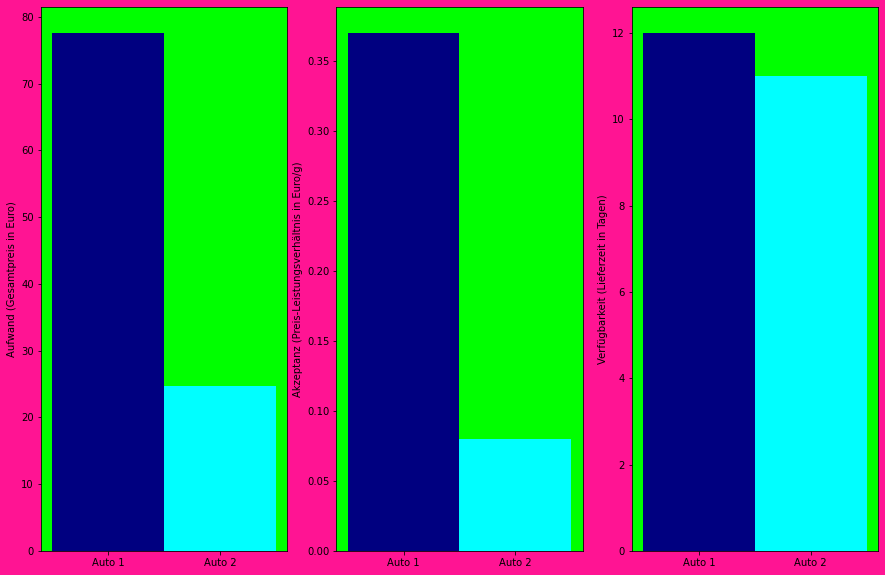

In [12]:
# Drei Subplots erstellt und Hintergrund gestaltet.
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
fig.set_facecolor("deeppink")

# Jeder berechnete KPI-Wert wird für beide Autos in jeweils einem Balkendiagramm für
# den Aufwand, die Akzeptanz und die Verfügbarkeit dargestellt.
# Dabei werden kontrastreiche Farben gewählt und die Achsen entsprechend beschriftet.
ax[0].set_facecolor("lime")
ax[0].bar("Auto 1", total_price_1, color="navy", width=1)
ax[0].bar("Auto 2", total_price_2, color="aqua", width=1)
ax[0].set_ylabel("Aufwand (Gesamtpreis in Euro)")

ax[1].set_facecolor("lime")
ax[1].bar("Auto 1", price_performance_ratio_1, color="navy", width=1)
ax[1].bar("Auto 2", price_performance_ratio_2, color="aqua", width=1)
ax[1].set_ylabel("Akzeptanz (Preis-Leistungsverhältnis in Euro/g)")

ax[2].set_facecolor('lime')
ax[2].bar("Auto 1", delivery_time_1, color="navy", width=1)
ax[2].bar("Auto 2", delivery_time_2, color="aqua", width=1)
ax[2].set_ylabel("Verfügbarkeit (Lieferzeit in Tagen)")

# Der Plot wird als svg-Datei gespeichert.
plt.savefig('plot.svg', format='svg')

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Bei allen errechneten KPIs konnte, im Vergleich zum ersten Fahrzeug, beim zweiten Auto eine Verbesserung erreicht werden. Macht man die Qualität nur von diesen drei Werten abhängig, ist diese Verbesserung vollumfänglich. Bei etwa gleicher Autogröße verringerte sich der Preis signifikant und die Lieferzeit nahm um einen Tag ab. Dieses Ergebnis gilt es jedoch kritisch zu hinterfragen, da viele weitere Parameter in den drei KPIs noch keinen Einfluss haben. Beispielsweise kommt die massive Preissenkung vor allem durch die Verwendung eines leeren Batteriekastens statt einer Komponente mit integriertem, wiederaufladbarem Akku zustande. Auch die teureren Reifen beim ersten Auto erscheinen passender für die Fahrzeuggröße. Die geringere Lieferzeit konnte durch einen Austausch der Zahnräder erwirkt werden. Die Wahl der Zahnräder sollte jedoch vor allem vom gewünschten Übersetzungsverhältnis abhängen, wenn man ein Auto nach seinen Wünschen bauen möchte.
Ich würde mich als Kunde für das erste Fahrzeug entscheiden. Um diese Wahl auch mit KPIs zu begründen, müsste man noch viel mehr KPI-Berechnungen (beispielsweise zur Funktionalität) mit weiteren Parametern durchführen und anhand dieser erneut abwägen, inwiefern das Wegsparen von Teilen aus dem ersten Fahrzeug sinnvoll ist, wenn man sein Fahrzeug als Hersteller auf den Markt bringen und verkaufen möchte. Dieses ist allerdings sehr komplex, weil bei Lego-Modellen nicht zuletzt auch ästhetische Merkmale eine Rolle spielen.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Durch das Pushen der KPI-Funktionen in Git, wo sich auch die Metadaten der Lego-Bauteile finden lassen, ist die Datengrundlage und -verarbeitung FINDABLE. Dadurch, dass sich die KPI-Werte im standardisierten json-Dateiformat der Autos befinden, sind sie leicht ACCESSIBLE für Andere, welche die Autodateien aufrufen. Die transparente Bereitstellung und Erklärung der KPI-Funktionen ermöglicht Anderen die Nutzung und Änderung beziehungsweise Weiterentwicklung für ihre Projekte im Rahmen der Datennutzungslizenz. Die KPIs sind somit INTEROPERABLE und REUSABLE. 

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Ich habe in dieser Aufgabe gelernt, wie man KPIs berechnen und für welche Zwecke man sie einsetzen kann. Wichtig dabei ist, dass man versteht wie die KPI-Werte zustande kommen, um begründete Aussagen darüber treffen zu können, welche KPI-Werte bei Vergleichen beispielsweise wirklich eine Verbesserung darstellen. Dann können sie beispielsweise bei der Auslegung technischer Systeme ein wichtiges Hilfsmittel sein, wenn zwischen mehreren Optionen eine Entscheidung getroffen werden muss.